Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
print ('Primjeri:\n',X)
y = np.array([4,1,2,5])
print ('Oznake:',y)

# plt.plot(X,y,'o')
# plt.show()

Primjeri:
 [[0]
 [1]
 [2]
 [4]]
Oznake: [4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
design_matrix=poly.fit_transform(X)
print ('Matrica dizajna:\n',design_matrix)
# print (design_matrix.transpose())

Matrica dizajna:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
# Vaš kôd ovdje

gram_matrix=np.matmul(design_matrix.transpose(),design_matrix)
inverse_gram_matrix=linalg.inv(gram_matrix)
temp=np.matmul(inverse_gram_matrix,design_matrix.transpose())
print ('Izračun pseudoinverza:\n',temp)
w=np.matmul(temp,y)
print ('Težine:',w)
print ('\n')

temp=linalg.pinv(design_matrix)
w2=np.matmul(temp,y)
print ('Izračun pseudoinverza preko fje pinv:\n', temp)
print ('Težine preko pseudoinverza:',w2)

Izračun pseudoinverza:
 [[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]
Težine: [2.2        0.45714286]


Izračun pseudoinverza preko fje pinv:
 [[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]
Težine preko pseudoinverza: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Pogreška učenja:	 2.042857142857143
4.085714285714286


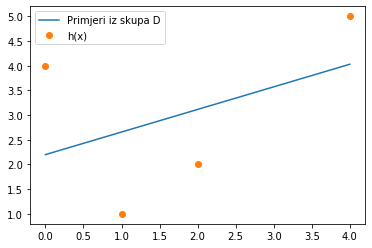

In [7]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error 

h = np.matmul(design_matrix, w)
error=mean_squared_error(y,h) #1/N
print ('Pogreška učenja:\t',error)  
error1 = 0.5*np.sum((y-h)**2)  #1/2
print (error1)  

plt.plot(X, h)
plt.plot(X, y,'o')
plt.legend(['Primjeri iz skupa D', 'h(x)'])



### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# Vaš kôd ovdje
try:
    print (np.matmul(linalg.inv(design_matrix),y))
except Exception as exception:
    print(type(exception))
    print(exception, "\nMatrica nije kvadratna->nema inverza")
    
#preslikavanje u višu dimenziju
    

<class 'numpy.linalg.LinAlgError'>
Last 2 dimensions of the array must be square 
Matrica nije kvadratna->nema inverza


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
# Vaš kôd ovdje
from sklearn.linear_model import LinearRegression

regression=LinearRegression().fit(design_matrix,y)

w0,w1=regression.intercept_, regression.coef_[1]
print ('Težine 1:\t',w0,w1)
print ('Težine 2:\t',w)
print ("\n")

prediction=regression.predict(design_matrix)
# print (prediction)

error2=mean_squared_error(y,prediction)
print ('Pogreška učenja 1:\t',error2)
print ('Pogreška učenja 2:\t',error)

Težine 1:	 2.2 0.45714285714285713
Težine 2:	 [2.2        0.45714286]


Pogreška učenja 1:	 2.042857142857143
Pogreška učenja 2:	 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [10]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    
    labels=[]
    for x in X:
        y=f(x)+(normal(0,noise))
        labels.append(y)
        
    return labels

    

In [11]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

def f(x):
    return 5+x-2*x**2-5*x**3


N=50 #skup za ucenje
noise=200 #šum

X = make_instances(-5, 5, N)
y = list(make_labels(X, f, noise))
y = np.array(y)
print(y)

[[ 671.13673268]
 [ 196.58549534]
 [ 599.00797851]
 [ 265.99360799]
 [ 157.21250466]
 [ 624.01369962]
 [ 398.99239075]
 [ 191.51684658]
 [ 137.97809575]
 [ 117.20436724]
 [ -33.77030066]
 [  83.89691095]
 [ -19.46902705]
 [ 470.19813825]
 [  32.36053815]
 [ -22.81449744]
 [ -30.16407167]
 [-383.72614427]
 [-240.10321758]
 [ 237.55858718]
 [  19.3170523 ]
 [ -42.322855  ]
 [ 161.47019826]
 [-124.24313163]
 [ 216.84935373]
 [ -66.89354824]
 [ 284.4374057 ]
 [  35.75945997]
 [  97.60243459]
 [ -82.56163501]
 [ 188.68053731]
 [-271.28887744]
 [ 117.3914462 ]
 [-161.03205276]
 [-488.64539256]
 [-253.72316125]
 [-198.68784239]
 [-294.71500409]
 [-215.1479924 ]
 [  21.36554444]
 [  51.7252992 ]
 [-452.24848556]
 [-563.46358756]
 [-343.38980574]
 [-159.42463903]
 [-317.40809183]
 [-407.34021569]
 [-986.467271  ]
 [-631.53325132]
 [-909.29814407]]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

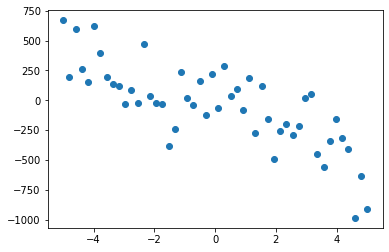

In [12]:
# Vaš kôd ovdje
plt.scatter(X, y);

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [13]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error

def get_model(X, y, d):
    poly = PolynomialFeatures(d)
    design_matrix = poly.fit_transform(X)
#     print (design_matrix)
    weights = np.matmul(linalg.pinv(design_matrix),y)
    return design_matrix, weights


def get_prediction_and_error(design_matrix, y, w):
    h = np.matmul(design_matrix,w)
    error = mean_squared_error(y, h)
    return h, error

Error:	 37174.89628052666


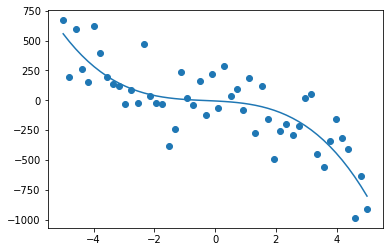

In [14]:
d=3

design_matrix, weights = get_model(X, y, d)
prediction, error = get_prediction_and_error(design_matrix, y, weights)

print("Error:\t", error)
plt.scatter(X, y)
plt.plot(X, prediction)
plt.show()




### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Error (d=1):	 53173.4755471285
Error (d=3):	 35031.06242688983
Error (d=5):	 34439.91744139147
Error (d=10):	 32410.427721621116
Error (d=20):	 24819.796754953695


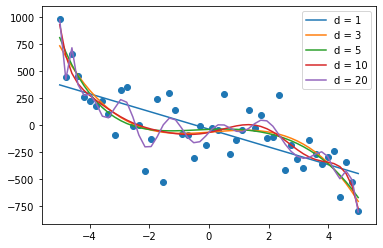

In [37]:
# Vaš kôd ovdje

degree=[1, 3, 5, 10, 20]

for d in degree:
    design_matrix,weights = get_model(X, y, d)
    prediction, E = get_prediction_and_error(design_matrix, y, weights)
    
    plt.plot(X, prediction, label="d = " + str(d))
    print("Error (d="+str(d)+"):\t", E)
    
plt.scatter(X, y)
plt.legend()
plt.show()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

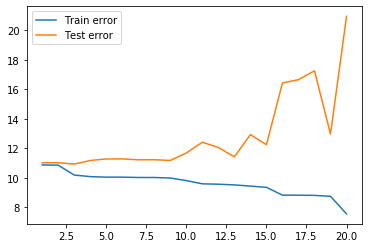

In [39]:
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

degree=list(range(1, 21))
train_error = []
test_error = []

for d in degree:
    design_matrix,weights = get_model(X_train, y_train, d)
    predict_train, E_train = get_prediction_and_error(design_matrix, y_train, weights)
    train_error.append(np.log(E_train))
    
    design_matrix_test, weights_test=get_model(X_test, y_test, d)
    predict_test, E_test = get_prediction_and_error(design_matrix_test, y_test,weights)    
    test_error.append(np.log(E_test))


plt.plot(degree, train_error, label="Train error")
plt.plot(degree, test_error, label="Test error")
plt.legend()
plt.show()




### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

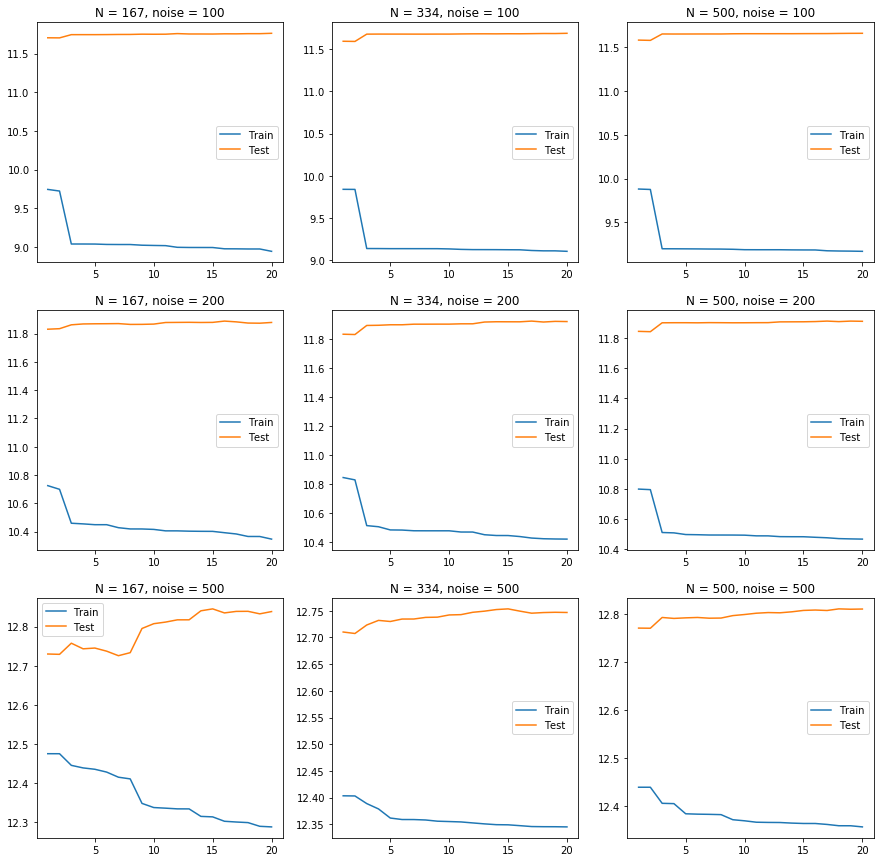

In [18]:
def training(X_train, X_test, y_train, y_test):
    
    Train_err=[]
    Test_err=[]
    for d in range(1, 21):
        X_tilda,w = get_model(X_train, y_train, d)
        h1, E_train = get_prediction_and_error(X_tilda, y_train, w)
        Train_err.append(np.log(E_train))

        X_temp, w1 = get_model(X_train, y_train, d)
        h2, E_test = get_prediction_and_error(X_temp, y_test, w)    
        Test_err.append(np.log(E_test))
    
    return Train_err, Test_err

#plotanje
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()

degree=list(range(1, 21))
noise = [100, 200, 500]
# N = [50, 100, 500] #ovliko cemo uzmiat iz test/train skupa
K = [1/3, 2/3, 1]

X = make_instances(-5,5,1000)
X_train, X_test = train_test_split(X, test_size=0.5)


for i, sigma in enumerate(noise):
    y = list(make_labels(X_train, f, sigma)) 
    y_train = np.array(y)
    y = list(make_labels(X_test,f,sigma)) 
    y_test = np.array(y)
    
    for j, n in enumerate(K):
        number_of_examples=math.floor(n*500)
        index_list = np.random.choice(np.arange(500), number_of_examples, replace=False)
        X1_train = X_train[index_list]
        y1_train = y_train[index_list]

        X1_test = X_test[index_list]
        y1_test = y_test[index_list]
        

        train,test=training(X1_train,X1_test,y1_train,y1_test)
        
        axs[i*3+j].set_title("N = " + str(math.ceil(n*500)) + ", noise = " + str(sigma))
        axs[i*3+j].plot(degree,train,label="Train")
        axs[i*3+j].plot(degree,test,label="Test")
        axs[i*3+j].legend()


plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
# Vaš kôd ovdje

def modified_eye(n):
    eye = np.eye(n)
    eye.itemset((0,0),0)
    return eye

def find_weights(reg_factor, design_matrix,y):
    gram_matrix=np.matmul(design_matrix.transpose(),design_matrix)
    identity_matrix=reg_factor*modified_eye(4)
    temp=gram_matrix+identity_matrix
    temp=linalg.inv(temp) 
    temp=np.matmul(temp,design_matrix.transpose())  
    w=np.matmul(temp,y)
     
    return w

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

d=3
reg_factor=[0,1,10]

design_matrix=PolynomialFeatures(d).fit_transform(X)
for i in range(len(reg_factor)):
    w=find_weights(reg_factor[i], design_matrix,y)
    print ('Težine uz lambda='+ str(reg_factor[i])+':\t',w)



Težine uz lambda=0:	 [ 4.         -5.91666667  3.375      -0.45833333]
Težine uz lambda=1:	 [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Težine uz lambda=10:	 [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
# Vaš kôd ovdje

reg_factors=[0,1,10]
for reg_factor in reg_factors:
    
    poly = PolynomialFeatures(3)
    design_matrix = poly.fit_transform(X)
    
    clf = Ridge(alpha = reg_factor)
    clf.fit(design_matrix, y) 
    
    print('Težine uz lambda='+str(reg_factor)+':\t',clf.coef_+clf.intercept_)

Težine uz lambda=0:	 [ 4.         -1.91666667  7.375       3.54166667]
Težine uz lambda=1:	 [3.05696145 2.3661678  2.77378685 3.20154195]
Težine uz lambda=10:	 [2.49444184 2.33546889 2.36021118 2.57600194]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

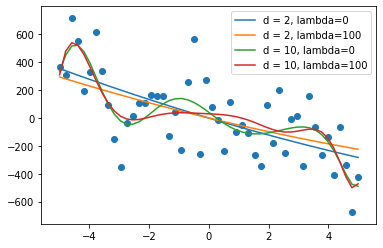

In [22]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = list(make_labels(X, f, 200))
y = np.array(y)

reg_factors = [0,100]
degrees = [2,10]


for d in degrees:
    poly = PolynomialFeatures(d)
    psi = poly.fit_transform(X)
    
    for factor in reg_factors:
        clf = Ridge(alpha = factor)
        clf.fit(psi, y)
        
        prediction = clf.predict(psi)
        plt.plot(X, prediction, label="d = " + str(d) + ", lambda=" + str(factor))

plt.scatter(X, y)
plt.legend()
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.78793e-22): result may not be accurate.
  overwrite_a=True).T
c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26167e-21): result may not be accurate.
  overwrite_a=True).T
c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03638e-21): result may not be accurate.
  overwrite_a=True).T
c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71517e-21): result may not be accurate.
  overwrite_a=True).T
c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39397e-21): result may not be accurate.
  overwrite_a=True).T
c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07276e-21): result

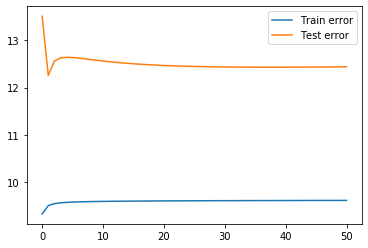

In [42]:
# Vaš kôd ovdje

poly = PolynomialFeatures(15)
design_matrix = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(design_matrix, y, test_size=0.5)

reg_factors=list(range(0, 51))
train_error = []
test_error = []

for reg_factor in reg_factors:
    
    clf = Ridge(alpha=reg_factor)
    clf.fit(X_train, y_train)
        
    prediction_train = clf.predict(X_train)
    train_error.append(np.log(sklearn.metrics.mean_squared_error(y_train, prediction_train)))
        
    prediction_test = clf.predict(X_test)
    test_error.append(np.log(sklearn.metrics.mean_squared_error(y_test, prediction_test)))

plt.plot(reg_factors, train_error, label="Train error")
plt.plot(reg_factors, test_error, label="Test error")
plt.legend()
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

[-37.1796212] 	 [[ 0.00000000e+00 -4.86947683e+00  3.75558263e+00 -9.48367984e+00
   6.55035079e-01 -1.56415956e-02  1.83641066e-01  1.45793685e-02
  -2.10288724e-02 -1.53441435e-04  5.34676193e-04]] [-37.1796212  -42.04909803 -33.42403857 -46.66330103 -36.52458612
 -37.19526279 -36.99598013 -37.16504183 -37.20065007 -37.17977464
 -37.17908652]


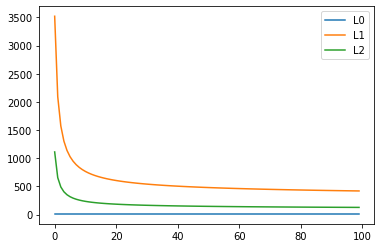

In [25]:
# Vaš kôd ovdje

from sklearn.linear_model import Ridge


X = make_instances(-5, 5, 50)
y = list(make_labels(X, f, 200))
y = np.array(y)

poly = PolynomialFeatures(10)
design_matrix = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(design_matrix, y, test_size=0.5)

reg_factors=list(range(0, 100))

L0 = []
L1 = []
L2 = []

for reg_factor in reg_factors:
    
    clf = Ridge(alpha = reg_factor)
    clf.fit(X_train, y_train)

    
    w0=clf.intercept_
    w=clf.coef_
    weights=w+w0
    weights=weights.flatten()
    
    L0_norm = nonzeroes(weights)
    L1_norm = np.sum(abs(weights))
    L2_norm = np.sqrt(np.matmul(weights.transpose(), weights))
    
    L0.append(L0_norm)
    L1.append(L1_norm)
    L2.append(L2_norm)
print (w0,'\t',w,weights)



plt.plot(reg_factors, L0, label="L0")
plt.plot(reg_factors, L1, label="L1")
plt.plot(reg_factors, L2, label="L2")
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

c:\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433582.89103881526, tolerance: 289.8351889409168
  positive)
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435145.95072779345, tolerance: 289.8351889409168
  positive)
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not conver

c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453538.83267207415, tolerance: 289.8351889409168
  positive)
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453667.7539528101, tolerance: 289.8351889409168
  positive)
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453793.8379396146, tolerance: 289.8351889409168
  positive)
c:\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453918.6879757502, tolerance: 289.8351889409168
  p

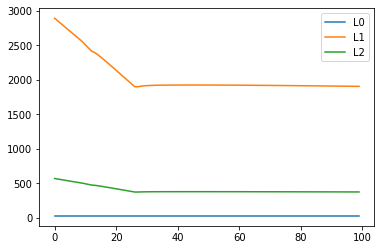

In [26]:
# Vaš kôd ovdje

from sklearn.linear_model import Lasso

X = make_instances(-5, 5, 50)
y = list(make_labels(X, f, 200))
y = np.array(y)

poly = PolynomialFeatures(25)
design_matrix = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(design_matrix, y, test_size=0.5)

reg_factors=list(range(0, 100))

L0 = []
L1 = []
L2 = []


for reg_factor in reg_factors:
    clf = Lasso(alpha = reg_factor)
    clf.fit(X_train, y_train)



    w0=clf.intercept_
    w=clf.coef_
    weights=w+w0
    weights=weights.flatten()
    
    L0_norm = nonzeroes(weights)
    L1_norm = np.sum(abs(weights))
    L2_norm = np.sqrt(np.matmul(weights.transpose(), weights))
        
    L0.append(L0_norm)
    L1.append(L1_norm)
    L2.append(L2_norm)

plt.plot(reg_factors, L0, label="L0")
plt.plot(reg_factors, L1, label="L1")
plt.plot(reg_factors, L2, label="L2")
plt.legend()
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

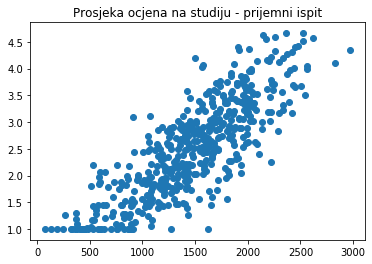

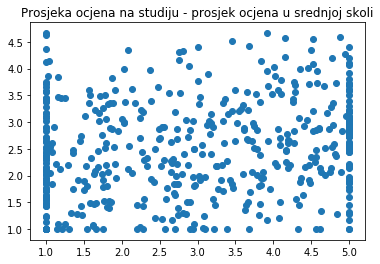

In [28]:
# Vaš kôd ovdje

exam_score1=[]
grades_in_highschool1=[]
for grade_X in grades_X:
    exam_score1.append(grade_X[0])
    grades_in_highschool1.append(grade_X[1])
    
    
plt.scatter(exam_score1, grades_y)
plt.title("Prosjeka ocjena na studiju - prijemni ispit")
plt.show()

plt.scatter(grades_in_highschool1, grades_y)
plt.title("Prosjeka ocjena na studiju - prosjek ocjena u srednjoj skoli")
plt.show()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [29]:
# Vaš kôd ovdje

clf = Ridge(alpha = 0.01)
clf.fit(grades_X, grades_y)
weights = []

weights.append(clf.intercept_)
weights.extend(list(clf.coef_))

print (weights)


[0.15061179575775974, 0.0014149686631874095, 0.09477275879174112]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Vaš kôd ovdje

scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed= scaler.transform(grades_X)
scaler.fit(np.reshape(grades_y,(-1,1)))
grades_y_fixed = scaler.transform(np.reshape(grades_y,(-1,1)))

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed, grades_y_fixed)

weights = []
weights.append(clf.intercept_[0])
weights.extend(clf.coef_[0])


print(weights)

[8.625513311328875e-17, 0.8163037502836595, 0.15167761205975835]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
# Vaš kôd ovdje

exam_score2=[]
grades_in_highschool2=[]
for grade_X in grades_X_fixed:
    exam_score2.append(grade_X[0])
    grades_in_highschool2.append(grade_X[1])

x=np.array(grades_in_highschool2)
m=np.asmatrix(x).T

grades_X_fixed_colinear=np.append(grades_X_fixed,m, axis=-1)

print (grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
# Vaš kôd ovdje

clf = Ridge(alpha=0.01)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)

weights = []
weights.append(clf.intercept_[0])
weights.extend(clf.coef_[0])

print (weights)



[8.625597096332916e-17, 0.8163036374131405, 0.07583956858557664, 0.07583956858852901]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
# Vaš kôd ovdje

broj_ponavljanja=10
reg_factors=[0.01,1000]
weights = []

for t in range(broj_ponavljanja):
    index_list = np.random.choice(np.arange(len(grades_X_fixed_colinear)), int(len(grades_X_fixed_colinear)*0.5), replace=False)
    random_X = grades_X_fixed_colinear[index_list]
    random_y = grades_y[index_list]
    
    for _,reg_factor in enumerate(reg_factors):
        
        clf = Ridge(alpha=int(reg_factor))
        clf.fit(random_X, random_y)
        weights.append(clf.coef_)
        print("Pokus", t, "lambda=", reg_factor," Težine:", clf.coef_)

        
for _,reg_factor in enumerate(reg_factors):
    print("lambda = ",reg_factor,"Mean= ", np.mean(weights, axis=0))
    print("lambda= ",reg_factor,"Standardna devijacija=", np.std(weights, axis=0))


Pokus 0 lambda= 0.01  Težine: [ 7.64171817e-01 -2.24154984e+14  2.24154984e+14]
Pokus 0 lambda= 1000  Težine: [0.1487578  0.02551896 0.02551896]
Pokus 1 lambda= 0.01  Težine: [0.74742297 0.13464172 0.        ]
Pokus 1 lambda= 1000  Težine: [0.15254524 0.03805593 0.03805593]
Pokus 2 lambda= 0.01  Težine: [ 7.42909907e-01  3.22287604e+13 -3.22287604e+13]
Pokus 2 lambda= 1000  Težine: [0.15107604 0.03616774 0.03616774]
Pokus 3 lambda= 0.01  Težine: [0.72358368 0.06948478 0.06948478]
Pokus 3 lambda= 1000  Težine: [0.14705785 0.02947751 0.02947751]
Pokus 4 lambda= 0.01  Težine: [0.75936599 0.06302455 0.06302455]
Pokus 4 lambda= 1000  Težine: [0.15491875 0.03612425 0.03612425]
Pokus 5 lambda= 0.01  Težine: [0.74707865 0.09864338 0.09864338]
Pokus 5 lambda= 1000  Težine: [0.13592283 0.03129226 0.03129226]
Pokus 6 lambda= 0.01  Težine: [0.74974663 0.07942859 0.07942859]
Pokus 6 lambda= 1000  Težine: [0.15645841 0.03912421 0.03912421]
Pokus 7 lambda= 0.01  Težine: [ 7.42915962e-01  1.19233334e+

c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60126e-17): result may not be accurate.
  overwrite_a=True).T
c:\python37\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81731e-17): result may not be accurate.
  overwrite_a=True).T


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
# Vaš kôd ovdje

reg_factors=[0.01,10]
gram_matrix = np.matmul(grades_X_fixed_colinear.transpose(),grades_X_fixed_colinear)

for _,reg_factor in enumerate(reg_factors):
    mat = gram_matrix + reg_factor*modified_eye(np.shape(gram_matrix)[0])
    print("lambda=",reg_factor,", kondicijski broj: ",np.linalg.cond(mat))


lambda= 0.01 , kondicijski broj:  100542.85592779591
lambda= 10 , kondicijski broj:  101.53146069838238


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  